### First part

Скачайте 10-20 изображений с лицами из интернета какими удобно средствами (например)
Воспользуйтесь одним из готовых face-detector/face-landmark-detector для того, чтобы на выбранных изображениях найти лицо и ключевые точки на лице. Можно для этого взять связку библиотек OpenCV (opencv-python) & dlib (dlib-python). Результат детектирования лица (bbox) & landmarks (points) визуализировать в jupyter-notebook для первых 5-10 картинок. 
Для визуализации можно использовать matplotlib, например 🕷️

In [1]:
import requests

import dlib
import cv2
import matplotlib.pyplot as plt

In [2]:
with open("./links_to_images.txt") as fh:
    for i, url in enumerate(fh.readlines(), start=1):
        response = requests.get(url.strip())
        if response.status_code == 200:
            with open(f"image_{i}.jpg", "wb") as file:
                file.write(response.content)
            print(f"INFO: Image {i} uploaded")
        else:
            print(f"ERROR: Image {i} uploading failed. Status code: {response.status_code}")

INFO: Image 1 uploaded
INFO: Image 2 uploaded
INFO: Image 3 uploaded
INFO: Image 4 uploaded
INFO: Image 5 uploaded
INFO: Image 6 uploaded
INFO: Image 7 uploaded
INFO: Image 8 uploaded
INFO: Image 9 uploaded
INFO: Image 10 uploaded


In [3]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

In [4]:
def face_detector(image_path: str) -> None:
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    faces = detector(img_rgb)
    
    plt.figure(figsize=(6,6))
    plt.imshow(img_rgb)
    
    for face in faces:
        x, y, w, h = face.left(), face.top(), face.width(), face.height()
        plt.gca().add_patch(plt.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none'))
        
        landmarks = predictor(img_rgb, face)
        for n in range(68):
            x, y = landmarks.part(n).x, landmarks.part(n).y
            plt.scatter(x, y, s=10, c="blue", marker="x")
    
    plt.axis("off")
    plt.show()

 3


INFO: Image image_1.jpg is processing


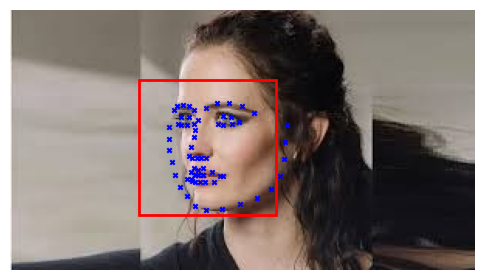

INFO: Detection done
---------------------------

INFO: Image image_2.jpg is processing


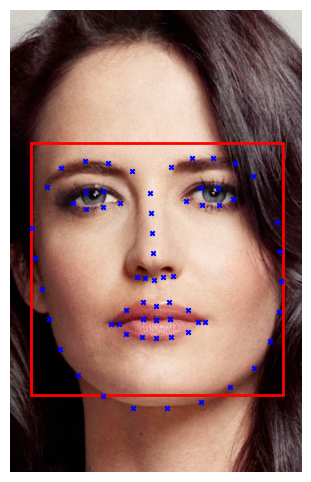

INFO: Detection done
---------------------------

INFO: Image image_3.jpg is processing


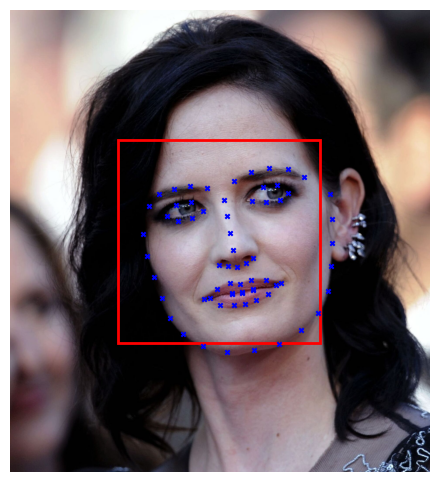

INFO: Detection done
---------------------------



In [5]:
start_idx = 1
n_images = int(input())
n_images = n_images if n_images < 9 else 5
for i in range(start_idx, start_idx + n_images):
    file_name = f"image_{i}.jpg"
    print(f"INFO: Image {file_name} is processing")
    face_detector(file_name)
    print(f"INFO: Detection done\n---------------------------\n")